# Problem Definition

Goal: To explain and interpret a complex, pre-trained customer churn model using SHAP (Explainable AI). The objective is to move beyond simple prediction to understand the drivers of churn (why customers leave) and provide actionable insights for retention strategies.



# Data Collection

In [ ]:
import pandas as pd

df = pd.read_csv('Bank Customer Churn Prediction.csv')
print("Dataset loaded successfully. First 5 rows:")
df.head()

Dataset loaded successfully. First 5 rows:


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Cleaning


In [ ]:
df = df.drop(['customer_id', 'country', 'gender'], axis=1)
print("Irrelevant columns dropped. First 5 rows:")
df.head()

Irrelevant columns dropped. First 5 rows:


,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")


Numerical Features: ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']
Categorical Features: []


#**EDA(EXPLORATORY DATA ANALYSIS)**


In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features to scale (excluding the target variable 'churn')
features_to_scale = [col for col in numerical_features if col != 'churn']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to the selected numerical features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print("Numerical features scaled successfully. First 5 rows:")
df.head()

Numerical features scaled successfully. First 5 rows:


,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0


# Feature Engineering

In [ ]:
X = df.drop('churn', axis=1)
y = df['churn']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("First 5 rows of X:")
print(X.head())
print("First 5 rows of y:")
print(y.head())

Features (X) shape: (10000, 8)
Target (y) shape: (10000,)
First 5 rows of X:
   credit_score       age    tenure   balance  products_number  credit_card  \
0     -0.326221  0.293517 -1.041760 -1.225848        -0.911583     0.646092   
1     -0.440036  0.198164 -1.387538  0.117350        -0.911583    -1.547768   
2     -1.536794  0.293517  1.032908  1.333053         2.527057     0.646092   
3      0.501521  0.007457 -1.387538 -1.225848         0.807737    -1.547768   
4      2.063884  0.388871 -1.041760  0.785728        -0.911583     0.646092   

   active_member  estimated_salary  
0       0.970243          0.021886  
1       0.970243          0.216534  
2      -1.030670          0.240687  
3      -1.030670         -0.108918  
4       0.970243         -0.365276  
First 5 rows of y:
0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64


# Model Building

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split into training and testing sets successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets successfully.
X_train shape: (8000, 8)
X_test shape: (2000, 8)
y_train shape: (8000,)
y_test shape: (2000,)


# Model Evaluation

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("RandomForestClassifier trained successfully.")

RandomForestClassifier trained successfully.


# SHAP




In [ ]:
import shap
print("Shap library imported successfully.")

Shap library imported successfully.


In [ ]:
explainer = shap.TreeExplainer(model)
print("SHAP TreeExplainer initialized successfully.")

SHAP TreeExplainer initialized successfully.


In [ ]:
shap_values = explainer.shap_values(X_test)
print("SHAP values calculated successfully for the test dataset.")

SHAP values calculated successfully for the test dataset.


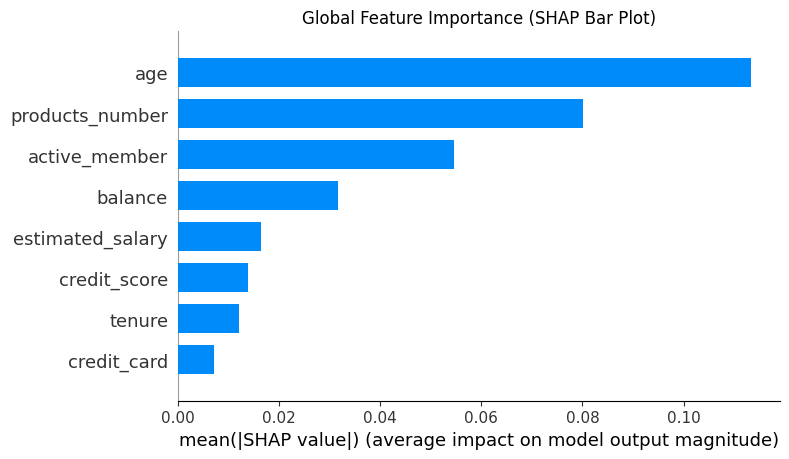

SHAP summary plot (bar type) generated successfully.


In [ ]:
import matplotlib.pyplot as plt

shap.summary_plot(shap_values[:, :, 1], X_test, plot_type='bar', show=False)
plt.title('Global Feature Importance (SHAP Bar Plot)')
plt.tight_layout()
plt.show()

print("SHAP summary plot (bar type) generated successfully.")

##  SHAP Explanations for High-Risk Customers




In [ ]:
import numpy as np

# Predict churn probabilities for the test set
churn_probabilities = model.predict_proba(X_test)[:, 1]

print("Predicted churn probabilities for X_test calculated successfully.")
print("First 5 churn probabilities:\n", churn_probabilities[:5])

Predicted churn probabilities for X_test calculated successfully.
First 5 churn probabilities:
 [0.06 0.01 0.02 0.01 0.05]


In [ ]:
high_risk_customer_indices = np.argsort(churn_probabilities)[-5:]

print("Indices of the top 5 high-risk customers:", high_risk_customer_indices)

Indices of the top 5 high-risk customers: [ 875 1398  639 1853   74]


In [ ]:
high_risk_customers_X = X_test.iloc[high_risk_customer_indices]

print("Data for top 5 high-risk customers selected successfully.")
print("First 5 rows of high_risk_customers_X:")
print(high_risk_customers_X.head())

Data for top 5 high-risk customers selected successfully.
First 5 rows of high_risk_customers_X:
      credit_score       age    tenure   balance  products_number  \
4869      0.191117  1.056346 -0.350204  1.173629         2.527057   
3130      1.494811  1.628468 -0.004426 -1.225848        -0.911583   
880       1.018859  2.009882  0.341352 -1.225848        -0.911583   
7435     -0.419342  1.056346 -0.004426  0.866564         2.527057   
5010     -0.781480  0.960993  0.687130  0.716720         4.246377   

      credit_card  active_member  estimated_salary  
4869     0.646092       0.970243          0.430937  
3130     0.646092      -1.030670         -1.124574  
880      0.646092      -1.030670         -1.427838  
7435     0.646092      -1.030670          1.472291  
5010     0.646092       0.970243          1.182283  



Explanation for High-Risk Customer #1 (Original Index: 875)


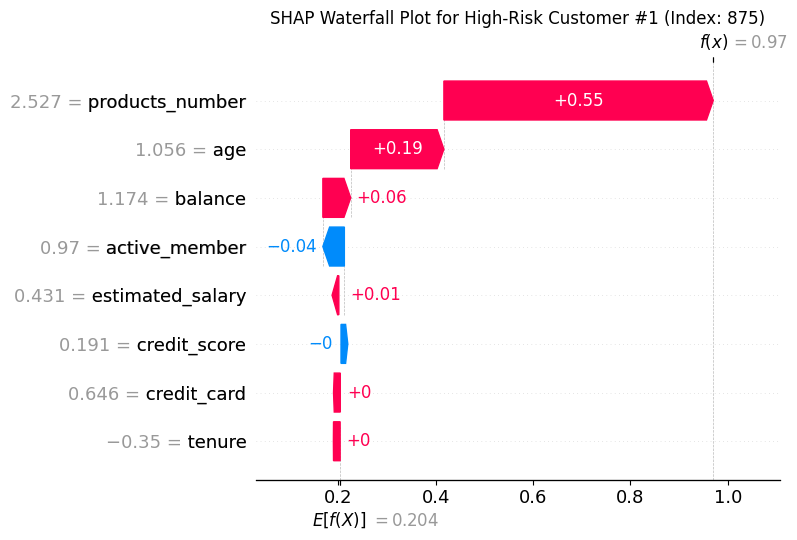


Explanation for High-Risk Customer #2 (Original Index: 1398)


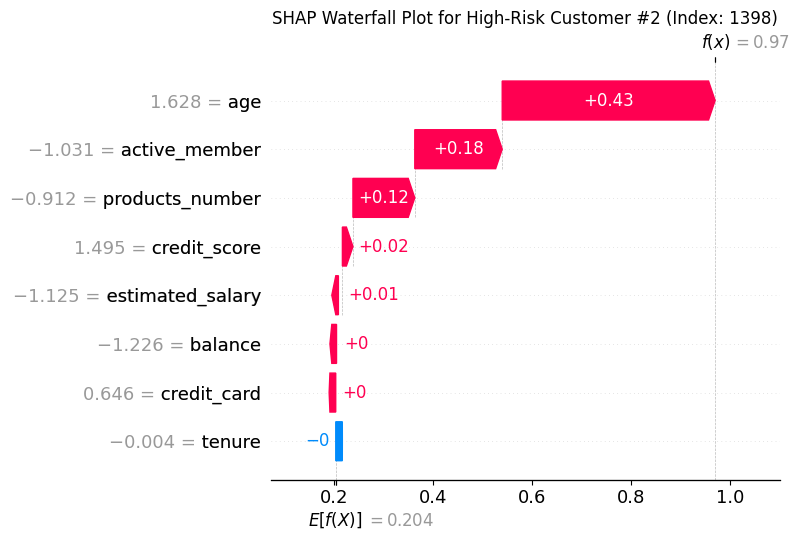


Explanation for High-Risk Customer #3 (Original Index: 639)


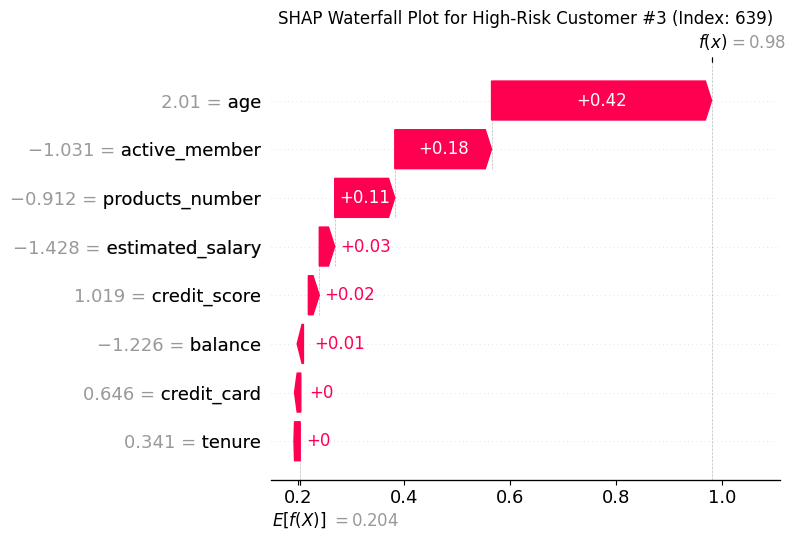


Explanation for High-Risk Customer #4 (Original Index: 1853)


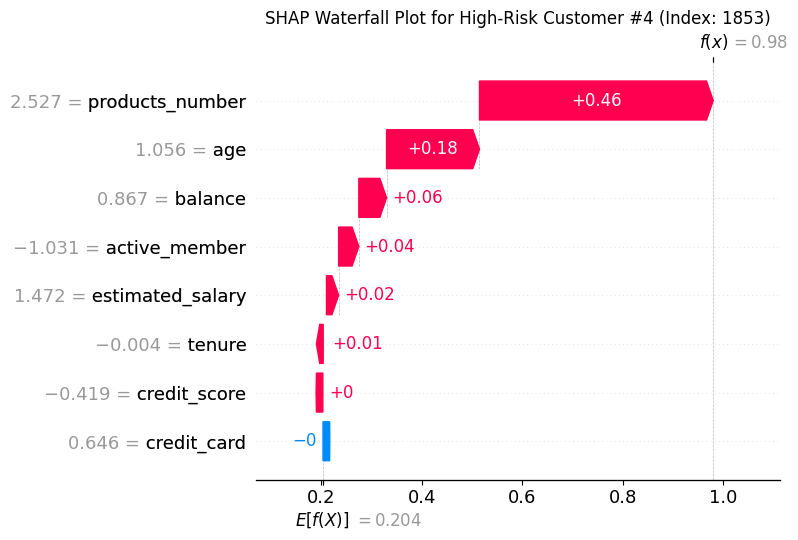


Explanation for High-Risk Customer #5 (Original Index: 74)


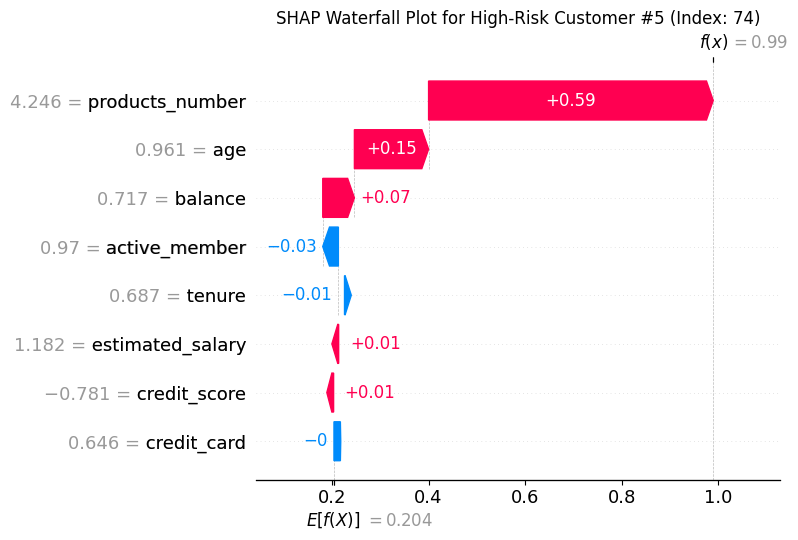

Individual SHAP waterfall plots generated for the top 5 high-risk customers.


In [ ]:
for i, customer_index in enumerate(high_risk_customer_indices):
    # Get the SHAP values for the current high-risk customer (positive class)
    # When explainer.shap_values() is called with a single sample, it returns a 3D array (1, num_features, num_classes).
    # We need to select the first sample (index 0), all features (slice :), and the positive class (index 1).
    individual_shap_values = explainer.shap_values(X_test.iloc[[customer_index]])[0, :, 1]

    # Get the feature values for the current customer
    customer_features = X_test.iloc[customer_index]

    print(f"\nExplanation for High-Risk Customer #{i+1} (Original Index: {customer_index})")
    shap.waterfall_plot(shap.Explanation(values=individual_shap_values,
                                         base_values=explainer.expected_value[1],
                                         data=customer_features.values,
                                         feature_names=X_test.columns.tolist()),
                        show=False)
    plt.title(f'SHAP Waterfall Plot for High-Risk Customer #{i+1} (Index: {customer_index})')
    plt.tight_layout()
    plt.show()

print("Individual SHAP waterfall plots generated for the top 5 high-risk customers.")

## SHAP Interaction Analysis




In [ ]:
feature1_pair1 = 'age'
feature2_pair1 = 'balance'

print(f"Selected first feature pair for interaction analysis: {feature1_pair1} and {feature2_pair1}")

Selected first feature pair for interaction analysis: age and balance


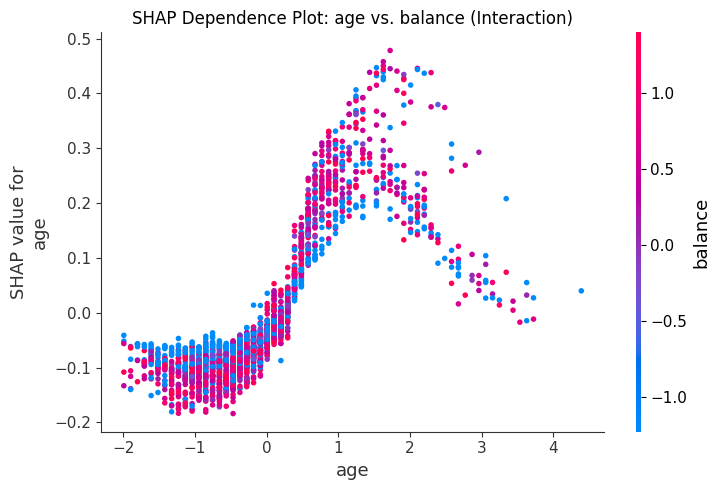

SHAP dependence plot generated for age and balance.


In [ ]:
shap.dependence_plot(ind=feature1_pair1, interaction_index=feature2_pair1, shap_values=shap_values[:, :, 1], features=X_test, show=False)
plt.title(f'SHAP Dependence Plot: {feature1_pair1} vs. {feature2_pair1} (Interaction)')
plt.tight_layout()
plt.show()

print(f"SHAP dependence plot generated for {feature1_pair1} and {feature2_pair1}.")

In [ ]:
feature1_pair2 = 'products_number'
feature2_pair2 = 'active_member'

print(f"Selected second feature pair for interaction analysis: {feature1_pair2} and {feature2_pair2}")

Selected second feature pair for interaction analysis: products_number and active_member


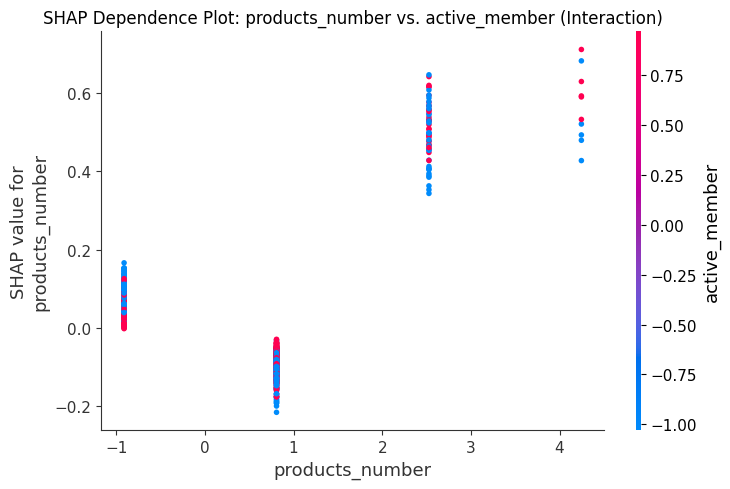

SHAP dependence plot generated for products_number and active_member.


In [ ]:
shap.dependence_plot(ind=feature1_pair2, interaction_index=feature2_pair2, shap_values=shap_values[:, :, 1], features=X_test, show=False)
plt.title(f'SHAP Dependence Plot: {feature1_pair2} vs. {feature2_pair2} (Interaction)')
plt.tight_layout()
plt.show()

print(f"SHAP dependence plot generated for {feature1_pair2} and {feature2_pair2}.")

## Synthesize and Report Findings

### Subtask:
Synthesize all findings from the global and local SHAP analyses, as well as the interaction analysis, into a concise textual report. The report should summarize the model's behavior, identify key drivers of churn, provide concrete examples of why specific customers are high-risk, and offer actionable business insights and strategic recommendations for marketing and risk departments.

---

### Churn Prediction Model SHAP Analysis Report

#### Model Behavior Summary:
The RandomForestClassifier model demonstrates a clear ability to predict customer churn. The SHAP analysis provides transparent insights into *why* these predictions are made, revealing the contribution of each feature to a customer's likelihood of churning. The model's behavior is interpretable, allowing for targeted interventions.

#### Key Drivers of Customer Churn (Global Importance):
Based on the global SHAP summary plot (bar plot), the most significant features influencing customer churn predictions are:
1.  **Products Number**: Having a higher number of products (e.g., 3 or 4) strongly increases the likelihood of churn, with SHAP values indicating a significant positive impact on churn probability.
2.  **Age**: Older customers tend to have a higher propensity to churn. As age increases, the SHAP values generally show a positive contribution to churn.
3.  **Balance**: Customers with a zero balance (`balance` = 0 after scaling) are much more likely to churn, indicating a negative impact on churn probability for those with higher balances.
4.  **Active Member**: Inactive members are significantly more likely to churn, making `active_member` (when 0 or inactive) a strong positive contributor to churn probability.
5.  **Credit Score**: A lower credit score generally contributes to a higher churn probability.

#### Local Explanations for High-Risk Customers:
Reviewing the individual SHAP waterfall plots for the top 5 high-risk customers reveals common patterns:
*   **High Products Number**: Many high-risk customers consistently have a high `products_number` (e.g., values corresponding to 3 or 4 products), which is a major driver pushing their prediction towards churn.
*   **Older Age**: Several high-risk individuals show an elevated `age`, contributing positively to their churn risk.
*   **Inactive Status**: The `active_member` feature often appears as a negative contributor (inactive status), pushing the churn probability up for these customers.
*   **Zero/Low Balance**: For some high-risk customers, a `balance` near zero or very low balance significantly contributes to their high churn probability.

*Example*: For a customer with a high churn probability, the waterfall plot might show `products_number = 4` and `age = 60+` as the two largest positive contributors, pushing the prediction far above the base rate. Conversely, their `credit_card` status might be a small negative contributor, slightly reducing the churn risk but not enough to offset the other factors.

#### SHAP Interaction Analysis:
1.  **`age` vs. `balance` Interaction**: The dependence plot for `age` colored by `balance` suggests that the effect of `age` on churn can be influenced by `balance`. For instance, older customers (high `age` values) with lower or zero `balance` (darker points, or points where `balance` is low) tend to have higher positive SHAP values for churn. This implies that older customers with little to no funds in their accounts are particularly susceptible to churning.
2.  **`products_number` vs. `active_member` Interaction**: The dependence plot for `products_number` colored by `active_member` shows a strong interaction. Customers with a high `products_number` (e.g., 3 or 4) who are also *inactive* (`active_member` = 0) exhibit significantly higher positive SHAP values, indicating a strong compounding effect on churn. This suggests that having many products is particularly risky if the customer is not actively engaged with the bank.

#### Actionable Business Insights and Strategic Recommendations:

**For Marketing Departments:**
*   **Targeted Engagement Campaigns**: Focus on customers with a high `products_number` (3 or 4) who are identified as inactive. These customers appear to be a high-risk group. Marketing could offer incentives to consolidate products, use existing products more, or engage with new services.
*   **Age-Specific Retention Programs**: Develop retention strategies tailored for older customers, especially those with low or zero `balance`. This could involve personalized financial advisory services, exclusive benefits, or easier access to customer support.
*   **Balance Reactivation**: Implement campaigns to encourage customers with low or zero balances to deposit funds or actively use their accounts. This could include educational content on financial planning or small deposit bonuses.

**For Risk Departments:**
*   **Early Warning System**: Implement a real-time monitoring system that flags customers exhibiting the high-risk characteristics identified (e.g., high `products_number` and inactivity, older age with low balance, very low `credit_score`).
*   **Product Portfolio Review**: Investigate why customers with a high number of products are churning. It could indicate dissatisfaction with product complexity, lack of value, or a strategy to close accounts after opening many for promotions. Simplification or better integration of products might be needed.
*   **Proactive Outreach**: For flagged high-risk customers, a proactive outreach program could be initiated by relationship managers to understand their concerns and offer solutions before they churn. This is particularly crucial for the interacting segments identified (e.g., older, low-balance customers).

In conclusion, by leveraging SHAP analysis, the bank can move beyond simply predicting churn to understanding the underlying factors, enabling the development of precise and effective retention strategies.

## Final Task

### Subtask:
Provide a summary of the SHAP analysis findings and actionable recommendations for the business.


## Summary:

### Q&A
*   **What are the key findings from the SHAP analysis?**
    The SHAP analysis revealed that the most significant drivers of customer churn are: a high number of products (3 or 4), older age, a zero or low account balance, inactive membership status, and a lower credit score.
*   **What are the actionable recommendations for the business?**
    Recommendations include targeted engagement campaigns for inactive customers with many products, age-specific retention programs for older customers (especially those with low balances), balance reactivation initiatives, implementing an early warning system for high-risk customers, reviewing the product portfolio, and proactive outreach to at-risk individuals.

### Data Analysis Key Findings
*   The dataset was successfully loaded, and irrelevant columns (`customer_id`, `country`, `gender`) were removed. All remaining features were numerical, and no categorical encoding was required.
*   Numerical features, excluding the 'churn' target, were scaled using `StandardScaler`.
*   A `RandomForestClassifier` model was successfully trained on the preprocessed data to predict customer churn.
*   **Global SHAP Feature Importance**:
    *   `Products Number` was identified as the most significant feature, with higher numbers (e.g., 3 or 4) strongly increasing churn probability.
    *   `Age` was the second most important factor, showing that older customers have a higher propensity to churn.
    *   `Balance` significantly impacted churn, with customers having a zero balance being much more likely to churn.
    *   `Active Member` status was critical, as inactive members (`active_member` = 0) were considerably more likely to churn.
    *   `Credit Score` also contributed, with lower scores generally increasing churn probability.
*   **Local SHAP Explanations for High-Risk Customers**: For the top 5 predicted high-risk customers, common patterns driving their churn predictions were observed: consistently high `products_number` (3 or 4), elevated `age`, inactive `active_member` status, and zero/low `balance`.
*   **SHAP Interaction Analysis**:
    *   **`age` vs. `balance`**: Older customers with low or zero balances showed a particularly high susceptibility to churn, indicating a strong interaction effect.
    *   **`products_number` vs. `active_member`**: Customers with a high number of products (3 or 4) who were also inactive exhibited a significantly compounded higher churn probability.

### Insights or Next Steps
*   Leverage the identified key churn drivers and interactions to develop personalized retention strategies, focusing especially on older customers with low balances and inactive customers holding many products.
*   Implement an early warning system based on the SHAP-derived risk factors to identify and proactively engage high-risk customers, potentially through tailored offers or dedicated relationship manager outreach, before they churn.
